In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [108]:
with open('/content/drive/MyDrive/BostonHousing.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [109]:
df = pd.read_csv('/content/drive/MyDrive/BostonHousing.csv', encoding=encoding)

In [110]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [111]:
df.shape

(506, 14)

In [112]:
# Dividing our dataset into independent and dependent features
X= df.iloc[:, 0: len(df.columns) - 1]
y= df.iloc[:, -1]

In [113]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state= 42)

In [114]:
# Standard SCaling on train and test data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [115]:
X_train= scaler.fit_transform(X_train)

In [116]:
X_test= scaler.transform(X_test)

In [117]:
# Model Training
from sklearn.linear_model import LinearRegression

In [118]:
# # Cross Validation
# from sklearn.model_selection import cross_val_score

In [119]:
# regressor= LinearRegression()
# regressor.fit(X_train, y_train)
# mse= cross_val_score(regressor, X_train, y_train, scoring= 'neg_mean_squared_error', cv= 5)

In [120]:
# np.mean(mse)

In [121]:
# # Prediction
# reg_pred= regressor.predict(X_test)

In [122]:
# sns.displot(reg_pred- y_test, kind='kde')

In [123]:
# from sklearn.metrics import r2_score

In [124]:
# score= r2_score(reg_pred, y_test)
# score

#### Feature Selection

In [138]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

<Axes: >

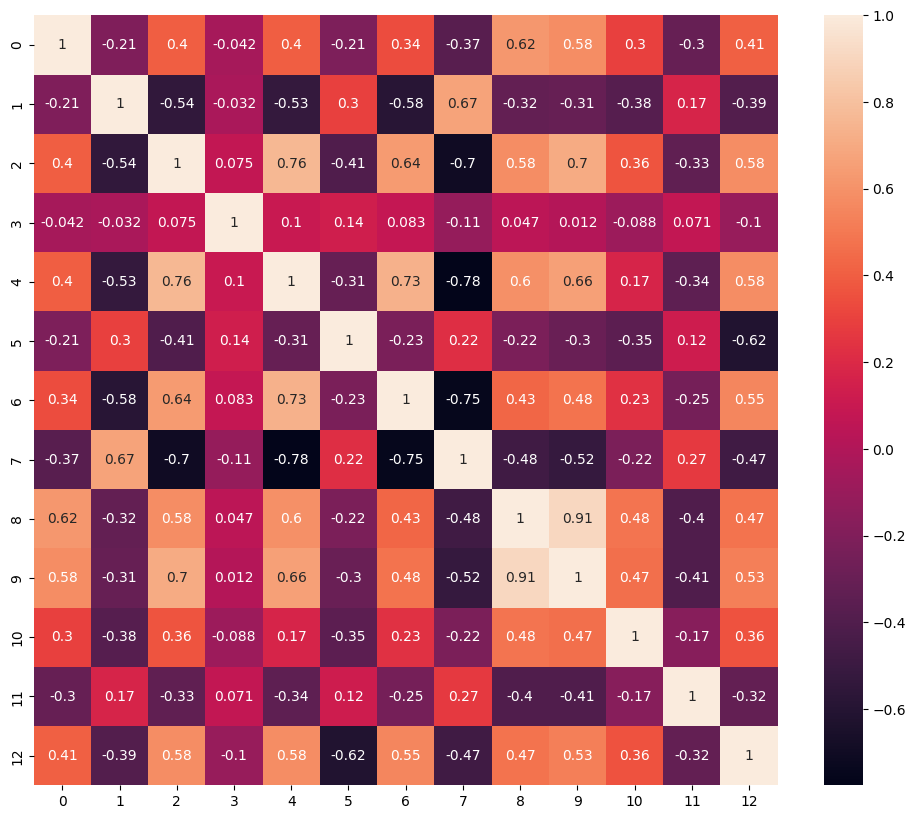

In [139]:
#checking for multicollinearity
plt.figure(figsize=(12, 10))
corr= X_train_df.corr()
sns.heatmap(corr, annot=True)

In [140]:
def correlation(df, threshold):
  col_corr= set()
  corr_matrix= df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i,j])> threshold):
        colname= corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [141]:
# Threshold -- Domain Expertise
corr_features= correlation(X_train_df, 0.85)
corr_features

{9}

In [142]:
X_test_df.drop(corr_features, axis=1, inplace= True)
X_train_df.drop(corr_features, axis=1, inplace= True)
X_train_df.shape, X_test_df.shape

((354, 12), (152, 12))

### Ridge Regresion

In [144]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge= Ridge()
ridge.fit(X_train, y_train)
y_pred= ridge.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)
print('Mean ABsolute Error : ', mae)
print('R2 score : ', score)

Mean ABsolute Error :  3.161026516515537
R2 score :  0.7108071617209415


## Accuracy: 71%

In [147]:
# Making Pickle file
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))